In [1]:
import torch
import sys
import os.path as osp
import tqdm
import sys
import numpy as np
sys.path.append('C:/Users/Asus/Desktop/mlpf-main')
from src.dataset.dataset import SimpleIterDataset
from src.utils.utils import to_filelist
from torch.utils.data import DataLoader
import dgl
import uproot
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import networkx as nx

In [2]:
class Args:
    def __init__(self):
        self.data_train = ['C:/Users/Asus/Desktop/mlpf-main/pf_tree_1.root']
        self.data_val = ['C:/Users/Asus/Desktop/mlpf-main/pf_tree_1.root']
        #self.data_train = files_train
        self.data_config = 'C:/Users/Asus/Desktop/mlpf-main/config_files/config_2_newlinks.yaml'
        self.extra_selection = None
        self.train_val_split = 0.8
        self.data_fraction = 1
        self.file_fraction = 1
        self.fetch_by_files = False
        self.fetch_step = 0.01
        self.steps_per_epoch = None
        self.in_memory = False
        self.local_rank = None
        self.copy_inputs = False
        self.no_remake_weights = False
        self.batch_size = 10
        self.num_workers = 0
        self.demo = False
        self.laplace = False
        self.diffs = False
        self.class_edges = False
args = Args()
train_range = (0, args.train_val_split)
train_file_dict, train_files = to_filelist(args, 'train')
train_data = SimpleIterDataset(train_file_dict, args.data_config, for_training=True,
                                   extra_selection=args.extra_selection,
                                   remake_weights= True,
                                   load_range_and_fraction=(train_range, args.data_fraction),
                                   file_fraction=args.file_fraction,
                                   fetch_by_files=args.fetch_by_files,
                                   fetch_step=args.fetch_step,
                                   infinity_mode= False,
                                   in_memory=args.in_memory,
                                   async_load = False,
                                   name='train')
iterator = iter(train_data)
g,gt = next(iterator)
g,gt

=== Restarting DataIter train, seed=None ===


(Graph(num_nodes=424, num_edges=2968,
       ndata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32), 'pos_hits': Scheme(shape=(3,), dtype=torch.float32), 'pos_hits_norm': Scheme(shape=(3,), dtype=torch.float32), 'hit_type': Scheme(shape=(4,), dtype=torch.int64), 'p_hits': Scheme(shape=(1,), dtype=torch.float32), 'e_hits': Scheme(shape=(1,), dtype=torch.float32), 'particle_number': Scheme(shape=(), dtype=torch.float32), 'particle_number_nomap': Scheme(shape=(), dtype=torch.float32)}
       edata_schemes={}),
 tensor([[ 4.0242e-02,  1.3637e-01,  9.8984e-01,  3.1291e+00,  3.1291e+00,
          -8.9315e-04, -2.2120e+03],
         [ 1.8313e-01,  5.9421e-01,  7.8319e-01,  1.5092e+01,  1.5092e+01,
           1.3958e-01,  2.1100e+02],
         [-5.2161e-02,  1.2527e-01,  9.9075e-01,  5.5626e-01,  2.4861e-01,
           4.9761e-01,  1.3000e+02]]))

In [3]:
hit_type = g.ndata['hit_type']
e = g.ndata['e_hits']
pos = g.ndata['pos_hits_norm']
hit_type_a = torch.argmax(hit_type,dim=1)
particle_id = g.ndata['particle_number']
pos_particles = gt[:,0:3]
e_particle = gt[:,3]
[torch.sum(e[particle_id == i]) for i in np.unique(particle_id)]
#e[hit_type_a==0]

[tensor(2.3524), tensor(17.6744), tensor(0.1358)]

iterate with different examples g,gt 
define particles 
define particles energy
size, color, shape should be different 


In [4]:
fig1 = px.scatter_3d(pos, x= pos[:,0], y= pos[:,1], z= pos[:,2],
                     size = particle_id, color = particle_id, symbol=particle_id)
                     #symbol= e_particle, size = e_particle, color =  e_particle)
            
fig2 = px.scatter_3d(pos_particles, x= pos_particles[:,0], y= pos_particles[:,1], z= pos_particles[:,2],
                     symbol= e_particle, size = e_particle, color =  e_particle)
fig2.update_traces(marker_size = 10)
showlegend = True
fig = go.Figure(data = fig1.data + fig2.data)

fig.show()


RuntimeError: The size of tensor a (903) must match the size of tensor b (5) at non-singleton dimension 0

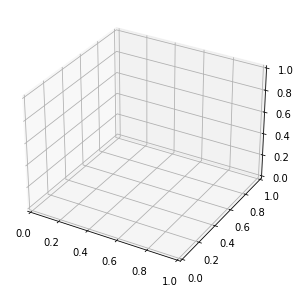

In [26]:

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')


z = pos_particles[:, 0]
x = pos_particles[:, 1]
c = pos_particles[:, 2]
particle_id_1 = particle_id - 1

start_x = pos_particles[:, 0]
start_y = pos_particles[:, 1]
start_z = pos_particles[:, 2]

arrow_x = pos[:, 0] - pos_particles[:, 0]
arrow_y = pos[:, 1] - pos_particles[:, 1]
arrow_z = pos[:, 2] - pos_particles[:, 2]

ax.quiver(start_x, start_y, start_z, arrow_x, arrow_y, arrow_z, color='r', alpha=0.1)

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], marker='o', c=particle_id, alpha=0.1)
ax.scatter(pos_particles[:, 0], pos_particles[:, 1], pos_particles[:, 2], marker='*', s=50, alpha=0.5)
ax.set_xlim([-0.5, 0.1])
ax.set_ylim([-1,1])
ax.set_zlim([-0.5, 0.2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Combined 3D Plot')

plt.show()


In [27]:
fig = make_subplots(rows=2, cols=1, specs=[[{'type': 'scatter3d'}], [{'type': 'scatter3d'}]])
fig.add_trace(go.Scatter3d(x=pos[:,0], y=pos[:,1], z=pos[:,2], mode='markers',
    marker=dict(size=e_particle, color=particle_id, opacity=0.6, symbol = 'cross' )), row=1, col=1)
fig.add_trace(go.Scatter3d(x=pos_particles[:, 0], y=pos_particles[:, 1], z=pos_particles[:, 2],
                            mode='markers', marker = dict (size = e_particle, color = particle_id,opacity= 0.5,symbol = "x")), row=2, col=1)

scatter1 = go.Scatter3d(x=pos[:, 0], y=pos[:, 1],z=pos[:, 2], mode='markers', marker=dict(size=e_particle, color=particle_id, opacity=0.6, symbol = 'cross' )
)
scatter2 = go.Scatter3d(x=pos_particles[:, 0],y=pos_particles[:, 1],z=pos_particles[:, 2],mode='markers',
    marker=dict(size=particle_id, color=particle_id, opacity=1 , symbol = 'diamond')
)
data = [scatter1, scatter2]
layout = go.Layout(scene=dict(aspectmode='data'))
fig1 = go.Figure(data=data, layout=layout)
fig1.show()
#pyo.plot(fig, filename='plot1.html')
#pyo.plot(fig1, filename = 'plot2.html')